Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/chriswilson/Desktop/ames/tf/lib/python3.11/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['MA_Line2' 'X2TPr_D' 'X2TSc_D' 'X2TPr_S' 'X2TSc_S' 'PA-PostD']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Best Random Forest Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Model Mean Squared Error: 545213541.8945923
Random Forest Model R-squared: 0.9083626967675016


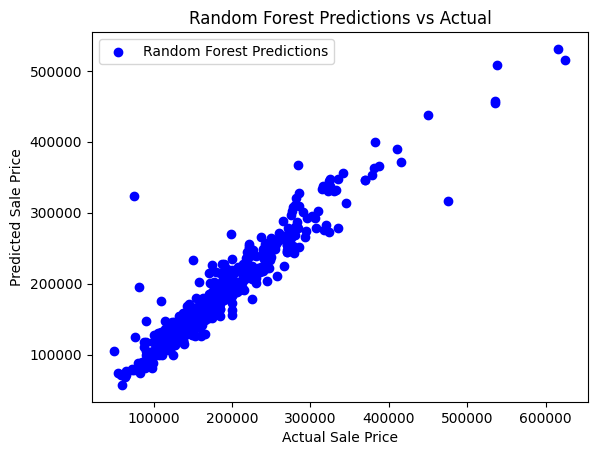

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.5min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  38.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.4min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  38.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.3min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  39.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.3min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  37.6s
[CV] END bootstrap=True, max_depth=None, min_s

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Import the functions from the module
from data_processing_module import load_data, preprocess_data, split_data

# Cell 2: Use the imported functions
file_path = 'merged3.csv'  # Update this path to the location of your file
target_column = 'SalePrice_x'
drop_columns = ['Unnamed: 0', 'PID', 'Index']

# Load the data
data = load_data(file_path)

# Preprocess the data
X_preprocessed, y, preprocessor = preprocess_data(data, target_column, drop_columns)

# Split the data
X_train, X_test, y_train, y_test = split_data(X_preprocessed, y)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='r2', cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")

# Make predictions with the best model
y_pred_rf = best_rf.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Model Mean Squared Error: {mse_rf}')
print(f'Random Forest Model R-squared: {r2_rf}')

# Optionally, you can plot the results or further analyze them
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest Predictions')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Random Forest Predictions vs Actual')
plt.legend()
plt.show()
